# PRÀCTICA 1 - REGRESSIÓ

1597487 | Manuel Arnau Fernández

1600123 | Alba Fernández Coronado

1605547 | Marina Palomar González

## 1. Descripció de les dades

In [11]:
# Carregant les llibreries necessàries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import collections as col

In [12]:
# Carregant el conjunt de dades
dataset = pd.read_csv(r'.\insurance.csv')
print(f'Mida de les dades: {dataset.shape}')
dataset.head()

Mida de les dades: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
# Entenent els tipus de variables de cada atribut
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
# Convertint cadenes a dades numèriques per poder més endavant poder treballar amb elles i fem one-hot encoding amb regió
dataset = pd.concat([dataset, pd.get_dummies(dataset.region, prefix='region')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset.smoker, drop_first=True, prefix='smoker')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset.sex, drop_first=True, prefix='is')], axis=1)
#dataset = dataset.drop(['region'], axis=1)
dataset = dataset.drop(['smoker'], axis=1)
dataset = dataset.drop(['sex'], axis=1)
dataset.head()

,age,bmi,children,region,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes,is_male
0,19,27.900,0,southwest,16884.92400,0,0,0,1,1,0
1,18,33.770,1,southeast,1725.55230,0,0,1,0,0,1
2,28,33.000,3,southeast,4449.46200,0,0,1,0,0,1
3,33,22.705,0,northwest,21984.47061,0,1,0,0,0,1
4,32,28.880,0,northwest,3866.85520,0,1,0,0,0,1


In [15]:
dataset.describe()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes,is_male
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.242152,0.242900,0.272048,0.242900,0.204783,0.505232
std,14.049960,6.098187,1.205493,12110.011237,0.428546,0.428995,0.445181,0.428995,0.403694,0.500160
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Un cop analitzats els atributs, es decideix quin atribut correspon a la varibale resposta. En aquest cas, s'aproximarà el valor de la variable *charges* mitjançant la combinació lineal de les altres sis característiques.

In [16]:
X = dataset.drop('charges', axis = 1)
Y = dataset['charges']

### INFORMACIÓ DE LA VARIABLE RESPOSTA

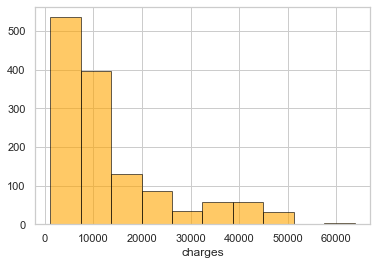

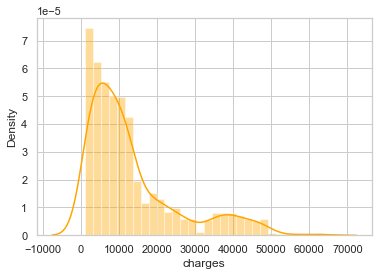

In [17]:
#DISTRIBUCIÓ DE LA VARIABLE OBJECTIU: EXPONENCIAL
plt.hist(dataset['charges'], color= 'orange', edgecolor = 'black', alpha = 0.6)
plt.xlabel('charges')
plt.show()
sns.distplot(dataset['charges'], color= 'orange')

Veiem que la funció charges segueix una distribució exponencial, per tal de facilitzarnos l'estudi, fem un canvi per que aquesta segueixi una distribució gausiana

In [18]:
dataset['charges_log'] = np.log(dataset['charges'])
dataset['charges_log'] = (dataset['charges_log'] - np.mean(dataset['charges_log']))/np.var(dataset['charges_log'])
dataset.head()

,age,bmi,children,region,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes,is_male,charges_log
0,19,27.900,0,southwest,16884.92400,0,0,0,1,1,0,0.752183
1,18,33.770,1,southeast,1725.55230,0,0,1,0,0,1,-1.947402
2,28,33.000,3,southeast,4449.46200,0,0,1,0,0,1,-0.826277
3,33,22.705,0,northwest,21984.47061,0,1,0,0,0,1,1.064546
4,32,28.880,0,northwest,3866.85520,0,1,0,0,0,1,-0.992382


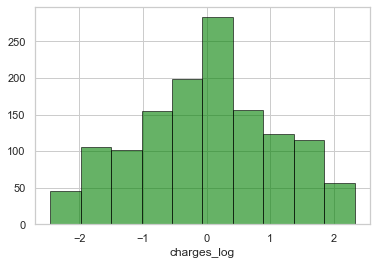

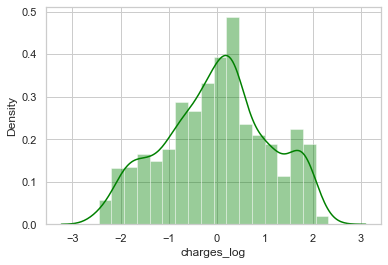

In [19]:
#DISTRIBUCIÓ DE LA VARIABLE OBJECTIU 2: GAUSSIANA
plt.hist(dataset['charges_log'], color= 'green', edgecolor = 'black', alpha = 0.6)
plt.xlabel('charges_log')
plt.show()
sns.distplot(dataset['charges_log'], color= 'green')

### ANÀLISI DELS ATRIBUTS

Southwest: 325, Southeast: 364, Northwest: 325, Northwest: 325


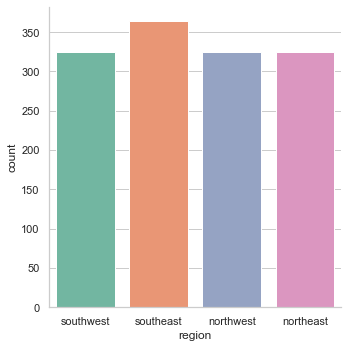

In [20]:
# Estudi de region
sns.catplot(x = "region", data = dataset, kind = "count", palette='Set2')
count = col.Counter(dataset['region'])
sw = count['southwest']
se = count['southeast']
ne = count['northwest']
nw = count['northwest']
print(f'Southwest: {sw}, Southeast: {se}, Northwest: {ne}, Northwest: {nw}')

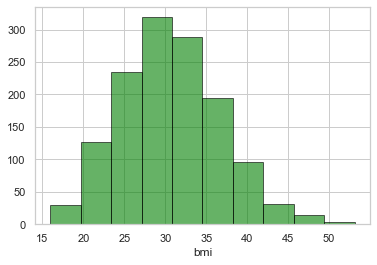

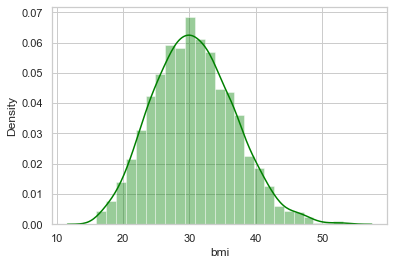

In [21]:
# Estudi de BMI
plt.hist(dataset['bmi'], color= 'green', edgecolor = 'black', alpha = 0.6)
plt.xlabel('bmi')
plt.show()

sns.distplot(dataset['bmi'], color= 'green')

Nombre total outliers en la distribució BMI: 9.


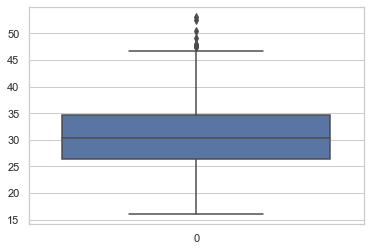

In [22]:
sns.boxplot(dataset['bmi'])
Q1 = dataset['bmi'].quantile(0.25)
Q3 = dataset['bmi'].quantile(0.75)
IQR = Q3 - Q1
total_outlier_num = ((dataset['bmi'] < (Q1 - 1.5 * IQR)) | (dataset['bmi'] > (Q3 + 1.5 * IQR))).sum()
print(f'Nombre total outliers en la distribució BMI: {total_outlier_num}.')

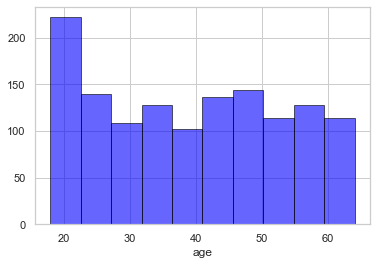

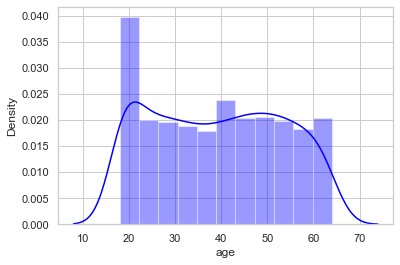

In [23]:
# Estudi de age
plt.hist(dataset['age'], color= 'blue', edgecolor = 'black', alpha = 0.6)
plt.xlabel('age')
plt.show()

sns.distplot(dataset['age'], color= 'blue')

Nombre total outliers en la distribució AGE: 0.


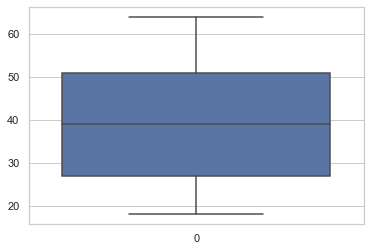

In [24]:
sns.boxplot(dataset['age'])
Q1 = dataset['age'].quantile(0.25)
Q3 = dataset['age'].quantile(0.75)
IQR = Q3 - Q1
total_outlier_num = ((dataset['age'] < (Q1 - 1.5 * IQR)) | (dataset['age'] > (Q3 + 1.5 * IQR))).sum()
print(f'Nombre total outliers en la distribució AGE: {total_outlier_num}.')

Homes: 676, Dones: 662


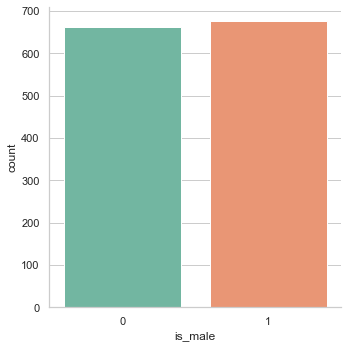

In [25]:
# Estudi de sex
sns.catplot(x = "is_male", data = dataset, kind = "count", palette='Set2')
count = col.Counter(dataset['is_male'])
female = count[0]
male = count[1]
print(f'Homes: {male}, Dones: {female}')

No fumadors: 1064, Fumadors: 274


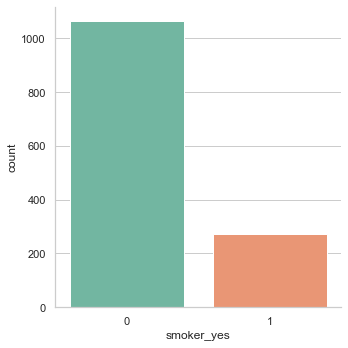

In [26]:
# Estudi de smoke
sns.catplot(x = "smoker_yes", data = dataset, kind = "count", palette='Set2')
count = col.Counter(dataset['smoker_yes'])
no_s = count[0]
s = count[1]
print(f'No fumadors: {no_s}, Fumadors: {s}')

### ANÀLISI DELS ATRIBUTS RESPECTE LA VARIABLE RESPOSTA

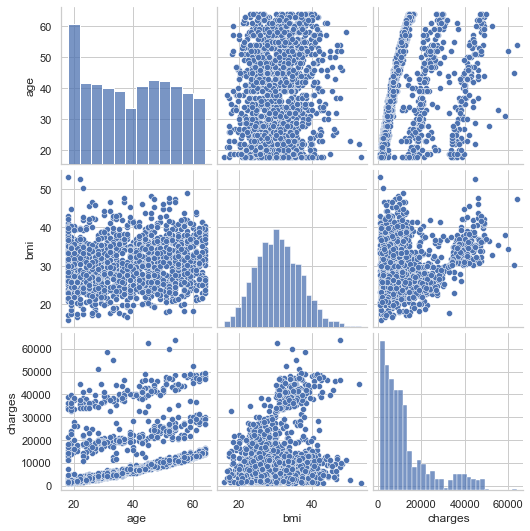

In [27]:
# Tracem relacions per parelles d'atributs no binaris
sns.pairplot(dataset.loc[:, ['age','bmi','charges']])

Conclusió de pairplot:

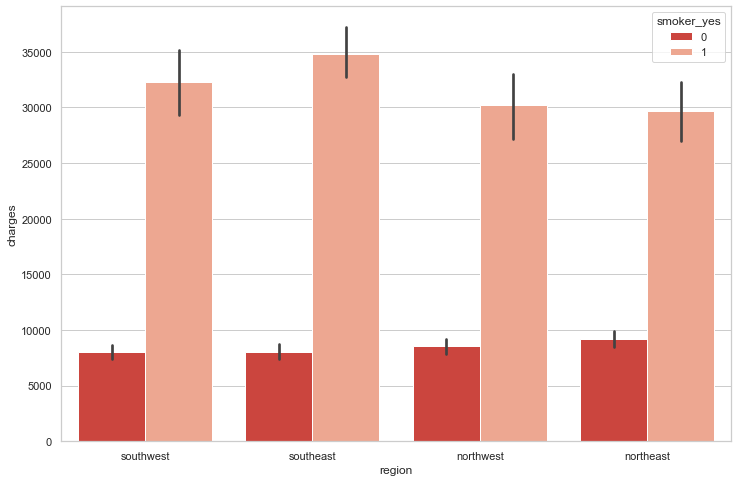

In [28]:
# Comparació fumadors i preus segons regió
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges', hue='smoker_yes', data=dataset, palette='Reds_r')

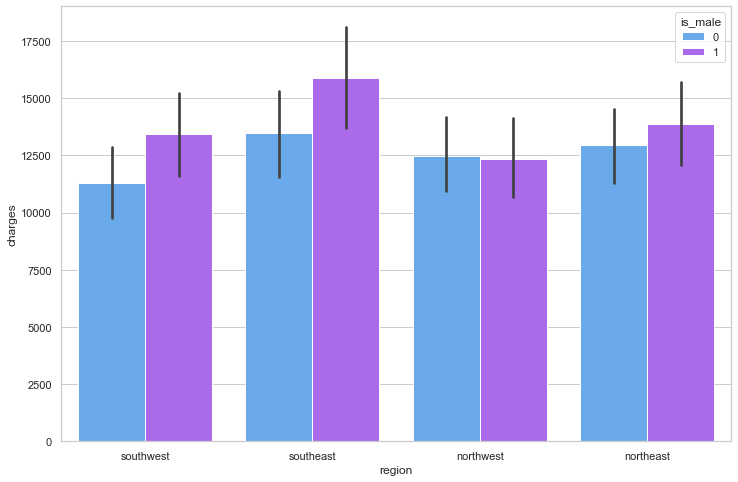

In [29]:
# Comparació genere i preus segons regió
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='is_male', data=dataset, palette='cool')

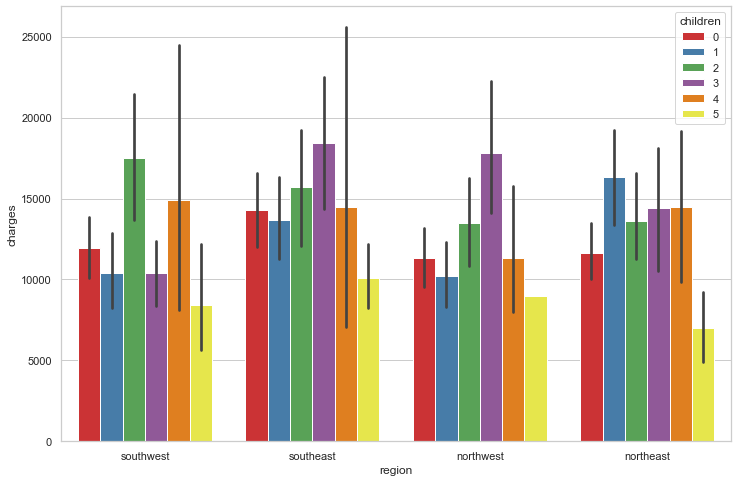

In [30]:
# Comparació genere i preus segons regió
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=dataset, palette='Set1')

Conclusió de barplots: